In [ ]:
# https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119418-understanding-the-data
# https://github.com/Architectshwet/Loan-prediction-using-Machine-Learning-and-Python/blob/master/Visualizations.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

train_original = df_train.copy()
test_original = df_test.copy()

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df_train['Loan_Status'].value_counts(normalize=True)

# This shows that 422 or 69% people were approved

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

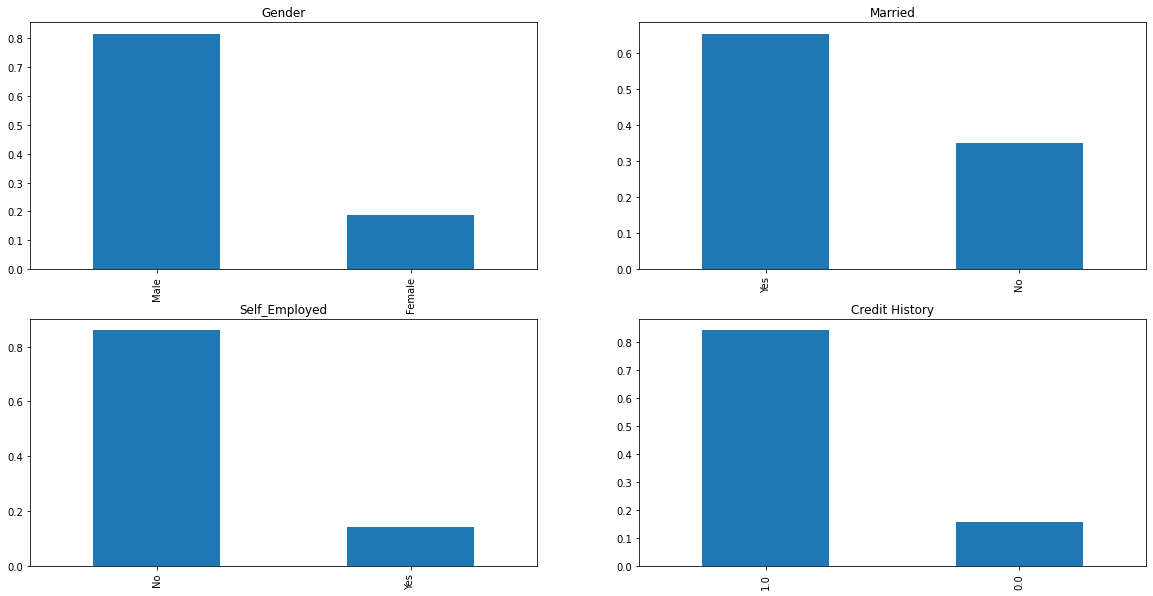

In [8]:
plt.figure(1) 
plt.subplot(221)
df_train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Gender')
plt.subplot(222) 
df_train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223) 
df_train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(224)
df_train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')
plt.show()

# 80% of applicants are male
# 65% married
# 15% self employed
# 85% repaid their debts

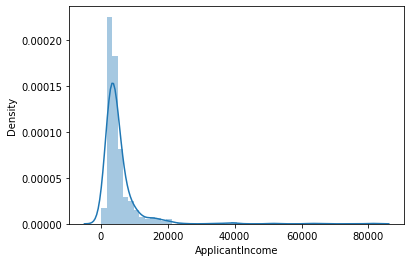

In [9]:
sns.distplot(df_train['ApplicantIncome']);

In [10]:
# Checking for missing values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
# In Loan Amount Term the value 360 is repeating a lot that's why mode is used  

In [12]:
df_train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df_train['LoanAmount'].value_counts()
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace = True)

In [14]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Filling missing values in test dataset
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace = True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace = True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace = True)

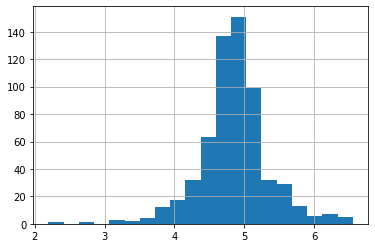

In [16]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [17]:
# Logistic Regression
# Drop Loan_ID because it doesn't affect the loan status
df_train = df_train.drop(['Loan_ID'], axis=1)
df_test = df_test.drop('Loan_ID', axis=1)

# Target Variable 'Loan Status' in different dataset
X = df_train.drop('Loan_Status', 1)
y = df_train.Loan_Status

In [18]:
# Converts categorial data like gender(categorical data) into numerical
X = pd.get_dummies(X)
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)
#model.fit(X, y)

LogisticRegression()

In [30]:
pred_cv = model.predict(x_cv)

In [31]:
accuracy_score(y_cv, pred_cv)

0.7621621621621621

In [32]:
pred_test = model.predict(df_test)

In [33]:
submission = pd.read_csv("my_submission.csv")

In [34]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [35]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [36]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [29]:
# Logistic Regression
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i = 1
s_mean = 0
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    s_mean += score
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(df_test)
print("\nMean score: ", s_mean/5)


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147

Mean score:  0.8012928162068507


In [97]:
# Decision Tree
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(df_test)


1 of kfold 5
accuracy_score 0.7073170731707317

2 of kfold 5
accuracy_score 0.7235772357723578

3 of kfold 5
accuracy_score 0.7073170731707317

4 of kfold 5
accuracy_score 0.7154471544715447

5 of kfold 5
accuracy_score 0.6885245901639344
